In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/data (1).csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:

# Display basic information and the first few rows to understand the structure
data_info = df.info()
data_head = df.head()
data_missing = df.isnull().sum()  # Checking for missing values in each column

data_info, data_head, data_missing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(None,
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0    842302         M        17.99         10.38          122.80     1001.0   
 1    842517         M        20.57         17.77          132.90     1326.0   
 2  84300903         M        19.69         21.25          130.00     1203.0   
 3  84348301         M        11.42         20.38           77.58      386.1   
 4  84358402         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    ...  texture_worst  perimeter_worst  

In [6]:
# Dropping irrelevant columns
data_cleaned = df.drop(columns=["id", "Unnamed: 32"])

# Verifying the columns after removal
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
from sklearn.preprocessing import LabelEncoder
# 0 (Benign): 357 instances
# 1 (Malignant): 212 instances
# Encoding the target variable
label_encoder = LabelEncoder()
data_cleaned['diagnosis'] = label_encoder.fit_transform(data_cleaned['diagnosis'])

# Verifying the encoding
data_cleaned['diagnosis'].value_counts()


,count
diagnosis,
0,357
1,212


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler
scaler = MinMaxScaler()

# Scaling the features (excluding the target variable 'diagnosis')
features = data_cleaned.drop(columns=["diagnosis"])
scaled_features = scaler.fit_transform(features)

# Creating a new DataFrame for the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['diagnosis'] = data_cleaned['diagnosis']  # Adding the target back

# Verifying the scaled data
scaled_data.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,0.372583
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,0.000000
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,0.000000
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [10]:
# Split the data into features (X) and target (y)
X = scaled_data.drop('diagnosis', axis=1)
y = scaled_data['diagnosis']

In [13]:
X.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
430,0.374793,0.433548,0.402944,0.229692,0.422858,0.623029,0.640347,0.482654,0.495455,0.400590,...,0.299538,0.414446,0.373475,0.159138,0.467080,0.661398,0.720367,0.850515,0.256456,0.396563
243,0.320365,0.475482,0.309239,0.189396,0.250970,0.149347,0.110052,0.116501,0.360101,0.091196,...,0.251868,0.381663,0.237014,0.127998,0.148650,0.113427,0.108546,0.209828,0.216440,0.053588
468,0.502579,0.460602,0.519729,0.355037,0.363456,0.555242,0.500469,0.498012,0.321212,0.499789,...,0.485237,0.449094,0.464117,0.307658,0.327082,0.437766,0.412540,0.685911,0.145082,0.441821
99,0.352075,0.340210,0.350287,0.211665,0.405254,0.290534,0.219963,0.290209,0.413636,0.293597,...,0.298826,0.502132,0.294288,0.157589,0.475005,0.267107,0.255112,0.537801,0.227282,0.252460
303,0.166075,0.300981,0.159422,0.080933,0.489031,0.145390,0.053819,0.088469,0.213131,0.337826,...,0.111348,0.333689,0.101350,0.046746,0.463118,0.074813,0.067276,0.224330,0.127735,0.153352


In [15]:
y.sample(5)

,diagnosis
345,0
402,0
499,1
424,0
57,1


In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

In [52]:
# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'model': model
    }

    # Print results for the current model
    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation mean accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Results for Random Forest:
Accuracy: 0.9649
Cross-validation mean accuracy: 0.9543 (+/- 0.0435)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Results for SVM:
Accuracy: 0.9737
Cross-validation mean accuracy: 0.9737 (+/- 0.0221)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



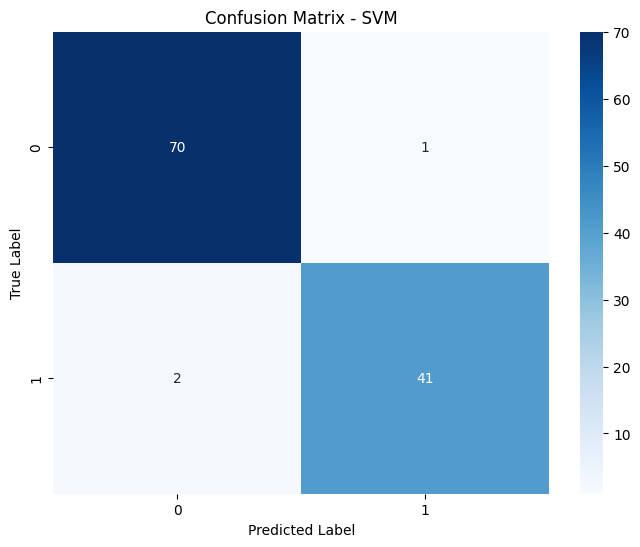

In [53]:
 # Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [54]:
# Select the best model based on cross-validation score
best_model_name = max(results, key=lambda k: results[k]['cv_mean'])
best_model = results[best_model_name]['model']

In [55]:
best_model_name

'SVM'

In [35]:
# Generate some sample test cases using random data within typical ranges
import numpy as np

# Create sample patients with random values within reasonable ranges
# Using the exact same feature names as in the original dataset
n_samples = 5  # Generate 5 sample patients

# Create random data within reasonable ranges for each feature
sample_patients = pd.DataFrame({
    'radius_mean': np.random.uniform(6, 28, n_samples),
    'texture_mean': np.random.uniform(9, 40, n_samples),
    'perimeter_mean': np.random.uniform(43, 189, n_samples),
    'area_mean': np.random.uniform(143, 2501, n_samples),
    'smoothness_mean': np.random.uniform(0.05, 0.16, n_samples),
    'compactness_mean': np.random.uniform(0.02, 0.35, n_samples),
    'concavity_mean': np.random.uniform(0, 0.43, n_samples),
    'concave points_mean': np.random.uniform(0, 0.2, n_samples),  # Corrected name
    'symmetry_mean': np.random.uniform(0.11, 0.30, n_samples),
    'fractal_dimension_mean': np.random.uniform(0.05, 0.1, n_samples),
    'radius_se': np.random.uniform(0.11, 2.87, n_samples),
    'texture_se': np.random.uniform(0.36, 4.88, n_samples),
    'perimeter_se': np.random.uniform(0.75, 21.98, n_samples),
    'area_se': np.random.uniform(6.8, 542.2, n_samples),
    'smoothness_se': np.random.uniform(0.002, 0.031, n_samples),
    'compactness_se': np.random.uniform(0.002, 0.135, n_samples),
    'concavity_se': np.random.uniform(0, 0.396, n_samples),
    'concave points_se': np.random.uniform(0, 0.053, n_samples),  # Corrected name
    'symmetry_se': np.random.uniform(0.008, 0.079, n_samples),
    'fractal_dimension_se': np.random.uniform(0.001, 0.029, n_samples),
    'radius_worst': np.random.uniform(7.93, 36.04, n_samples),
    'texture_worst': np.random.uniform(12.02, 49.54, n_samples),
    'perimeter_worst': np.random.uniform(50.41, 251.2, n_samples),
    'area_worst': np.random.uniform(185.2, 4254.0, n_samples),
    'smoothness_worst': np.random.uniform(0.071, 0.223, n_samples),
    'compactness_worst': np.random.uniform(0.027, 1.058, n_samples),
    'concavity_worst': np.random.uniform(0, 1.252, n_samples),
    'concave points_worst': np.random.uniform(0, 0.291, n_samples),  # Corrected name
    'symmetry_worst': np.random.uniform(0.156, 0.664, n_samples),
    'fractal_dimension_worst': np.random.uniform(0.055, 0.208, n_samples)
})

# Make predictions
predictions = predict_cancer(sample_patients)

# Create a DataFrame with sample data and predictions
results_df = sample_patients.copy()
results_df['Prediction'] = predictions
results_df['Diagnosis'] = ['Malignant' if pred == 1 else 'Benign' for pred in predictions]

# Display results with key features and prediction
print("\nPredictions for Sample Patients:")
print("\nSummary of predictions:")
for i in range(n_samples):
    print(f"\nPatient {i+1}:")
    print(f"Diagnosis: {results_df['Diagnosis'][i]}")
    print("Key measurements:")
    print(f"- Radius (mean): {results_df['radius_mean'][i]:.2f}")
    print(f"- Texture (mean): {results_df['texture_mean'][i]:.2f}")
    print(f"- Perimeter (mean): {results_df['perimeter_mean'][i]:.2f}")
    print(f"- Area (mean): {results_df['area_mean'][i]:.2f}")

# Display distribution of predictions
print("\nOverall Distribution:")
print(results_df['Diagnosis'].value_counts())


Predictions for Sample Patients:

Summary of predictions:

Patient 1:
Diagnosis: Malignant
Key measurements:
- Radius (mean): 24.49
- Texture (mean): 14.33
- Perimeter (mean): 133.14
- Area (mean): 2138.80

Patient 2:
Diagnosis: Malignant
Key measurements:
- Radius (mean): 11.23
- Texture (mean): 10.78
- Perimeter (mean): 68.80
- Area (mean): 816.08

Patient 3:
Diagnosis: Malignant
Key measurements:
- Radius (mean): 24.60
- Texture (mean): 23.83
- Perimeter (mean): 98.67
- Area (mean): 367.72

Patient 4:
Diagnosis: Malignant
Key measurements:
- Radius (mean): 11.33
- Texture (mean): 25.04
- Perimeter (mean): 159.14
- Area (mean): 1636.12

Patient 5:
Diagnosis: Malignant
Key measurements:
- Radius (mean): 26.96
- Texture (mean): 15.84
- Perimeter (mean): 162.75
- Area (mean): 1829.38

Overall Distribution:
Diagnosis
Malignant    5
Name: count, dtype: int64
